In [44]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [45]:
# import data and display the first 5 rows

address = 'C:/Users/hjbvl/Practice Data/titanic.csv'

titanic = pd.read_csv(address)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
titanic.shape

(891, 12)

In [47]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [48]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Explore the Continuous Data

In [49]:
# Drop all the categorial features
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']
titanic_con = titanic.drop(cat_feat, axis=1)

In [50]:
# Look at the general distribution of these features
titanic_con.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
# Look at the correlation matrix
titanic_con.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [52]:
# Look at the distribution of the fare by different passenger class levels
titanic_con.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [53]:
# Create a function for the distribution of target variable per continuous variables
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(titanic_con.groupby('Survived')[feature].describe())
    print(ttest(feature))

# Create a function for a two-sample independent t-test
def ttest(feature):
    survived = titanic_con[titanic_con['Survived']==1][feature]
    not_survived = titanic_con[titanic_con['Survived']==0][feature]
    tstat, pval = stats.ttest_ind(survived, not_survived, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [54]:
# Look at the distribution of each feature at each level of the target variable
for feature in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    describe_cont_feature(feature)


*** Results for Pclass ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
t-statistic: -10.3, p-value: 2.91e-23
None

*** Results for Age ***
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
t-statistic: nan, p-value: nan
None

*** Results for SibSp ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
t-statistic: -1.2, p-value: 0.233
None

*** Results for Parch ***
          count

In [55]:
# Look at the average value of each feature based on whether Age is missing
titanic_con.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


### Data Visualization

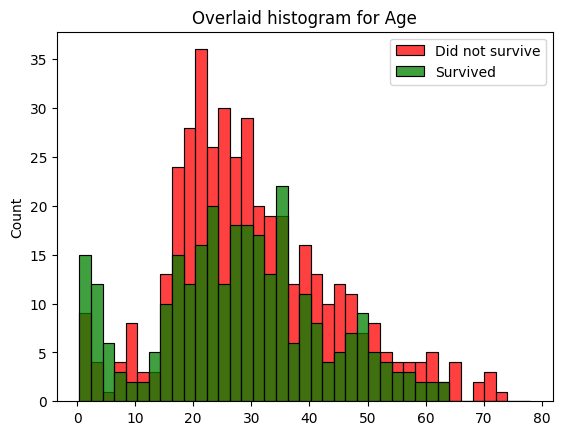

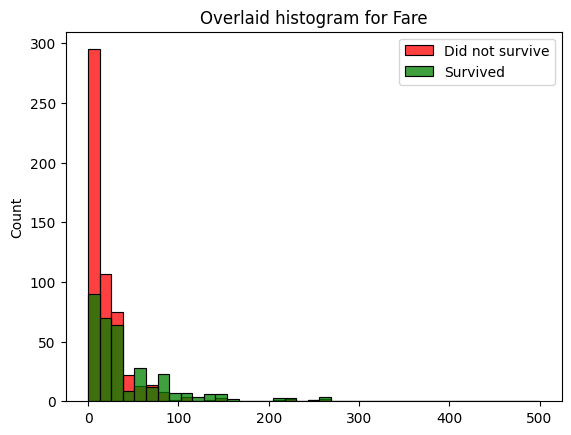

In [56]:
# Plot overlaid histograms for continuous features
for i in ['Age', 'Fare']:
    died = list(titanic_con[titanic_con['Survived']==0][i].dropna())
    survived = list(titanic_con[titanic_con['Survived']==1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.histplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.histplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

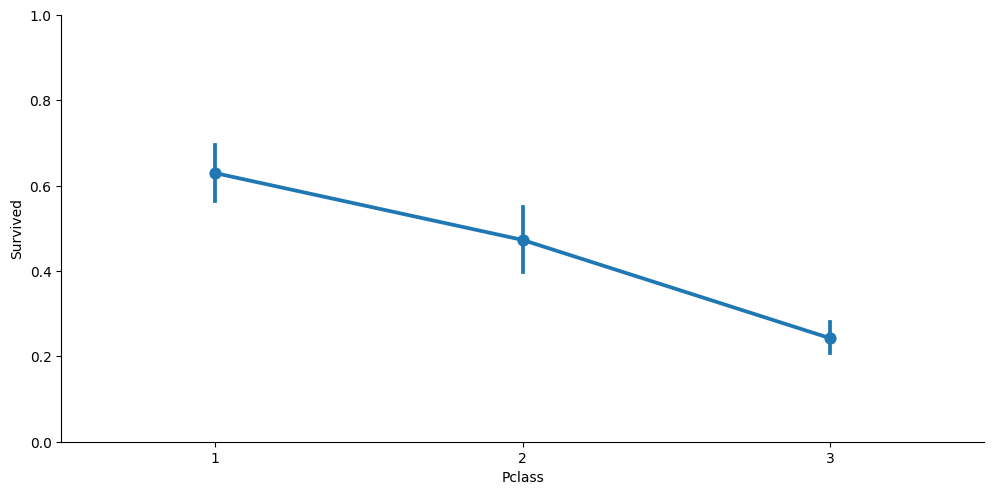

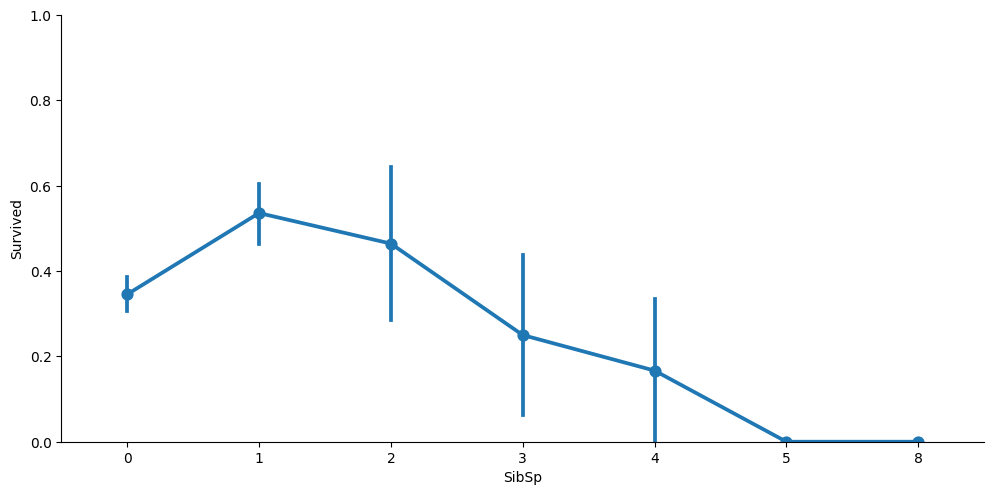

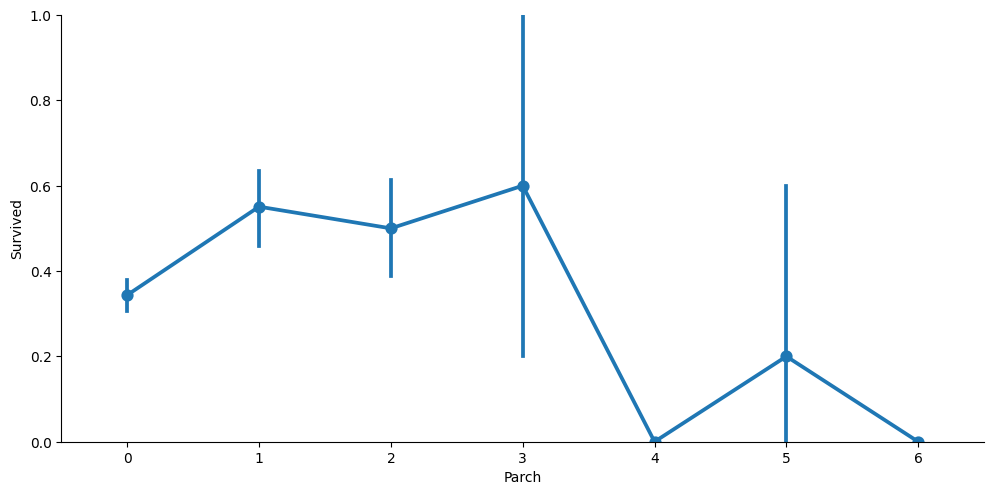

In [57]:
# Generate categorical plots for ordinal features
for col in ['Pclass', 'SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=titanic_con, kind='point', aspect=2)
    plt.ylim(0, 1)

## Explore the Categorical Data

In [79]:
# Drop all continuous features
cont_feat = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
titanic_cat = titanic.drop(cont_feat, axis=1)
titanic_cat.head()

,PassengerId,Survived,Name,Sex,Ticket,Cabin,Embarked
0,1,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,3,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,5,0,"Allen, Mr. William Henry",male,373450,NaN,S


In [80]:
# Check if there are any missing values
titanic_cat.isnull().sum()

PassengerId      0
Survived         0
Name             0
Sex              0
Ticket           0
Cabin          687
Embarked         2
dtype: int64

In [81]:
# Explore the number of unique values for each feature
for col in titanic_cat.columns:
    print('{}: {} unique values'.format(col, titanic_cat[col].nunique()))

PassengerId: 891 unique values
Survived: 2 unique values
Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values


In [82]:
# Check survival rate by gender
titanic_cat.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [83]:
# Check survival rate by which port the passenger departed from
titanic_cat.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [84]:
# Is the missing data in the 'Cabin' feature random?
titanic_cat.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [85]:
# Look at unique values for the 'Ticket' feature
titanic_cat['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [86]:
# Create a title feature by parsing passenger name
titanic_cat['Title'] = titanic_cat['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic_cat.head()

,PassengerId,Survived,Name,Sex,Ticket,Cabin,Embarked,Title
0,1,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs
2,3,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs
4,5,0,"Allen, Mr. William Henry",male,373450,NaN,S,Mr


In [87]:
# Look at the survival rate by the title
titanic_cat.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

In [88]:
# Change the name of the 'Title' column to 'Title Raw' and create a new 'Title' column
titanic_cat.rename(columns={'Title': 'Title_Raw'}, inplace=True)
titanic_cat['Title'] = titanic_cat['Title_Raw'].apply(lambda x: x if x in ['Master', 'Miss', 'Mr', 'Mrs'] else 'Other')
titanic_cat.head(-5)

,PassengerId,Survived,Name,Sex,Ticket,Cabin,Embarked,Title_Raw,Title
0,1,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs,Mrs
2,3,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs,Mrs
4,5,0,"Allen, Mr. William Henry",male,373450,NaN,S,Mr,Mr
...,...,...,...,...,...,...,...,...,...
881,882,0,"Markun, Mr. Johann",male,349257,NaN,S,Mr,Mr
882,883,0,"Dahlberg, Miss. Gerda Ulrika",female,7552,NaN,S,Miss,Miss
883,884,0,"Banfield, Mr. Frederick James",male,C.A./SOTON 34068,NaN,S,Mr,Mr
884,885,0,"Sutehall, Mr. Henry Jr",male,SOTON/OQ 392076,NaN,S,Mr,Mr


In [89]:
# Create a Cabin indicator variable
titanic_cat['Cabin_ind'] = np.where(titanic_cat['Cabin'].isnull(), 0, 1)
titanic_cat.head()

,PassengerId,Survived,Name,Sex,Ticket,Cabin,Embarked,Title_Raw,Title,Cabin_ind
0,1,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr,Mr,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs,Mrs,1
2,3,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss,Miss,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs,Mrs,1
4,5,0,"Allen, Mr. William Henry",male,373450,NaN,S,Mr,Mr,0


### Data Visualization

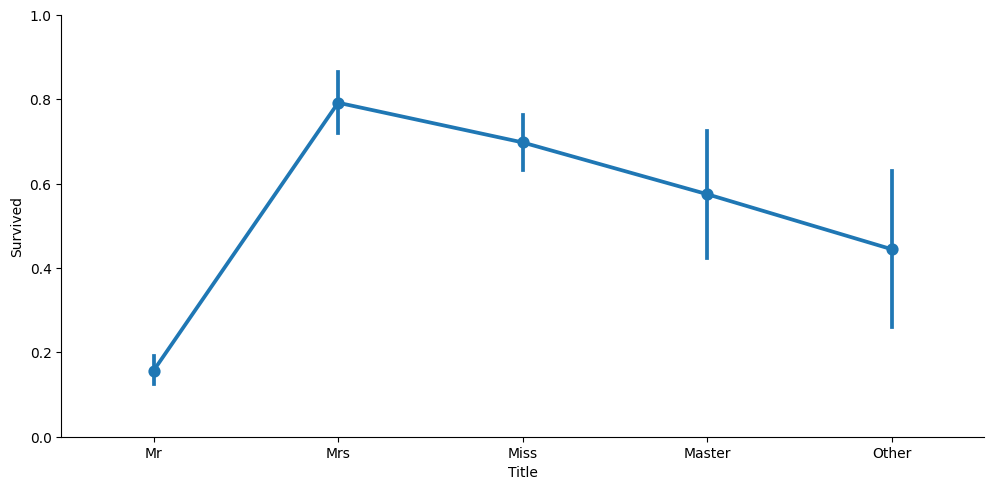

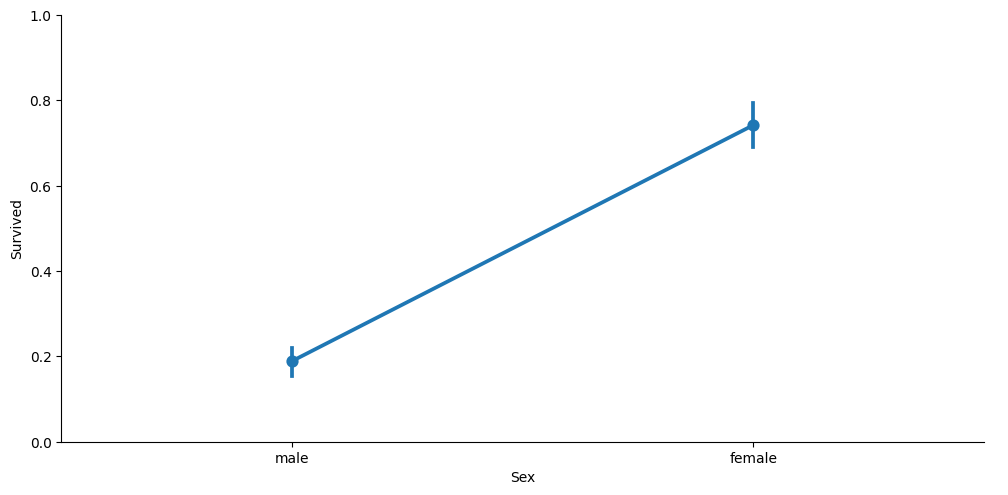

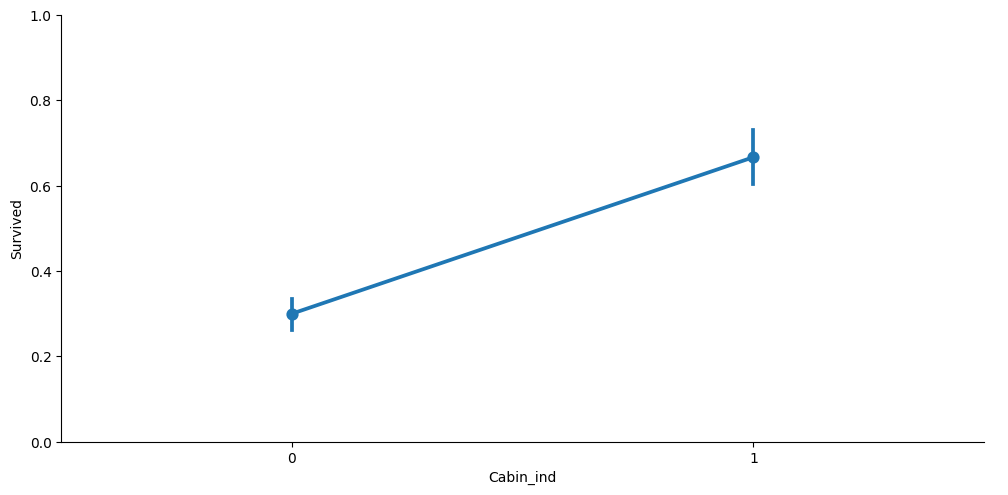

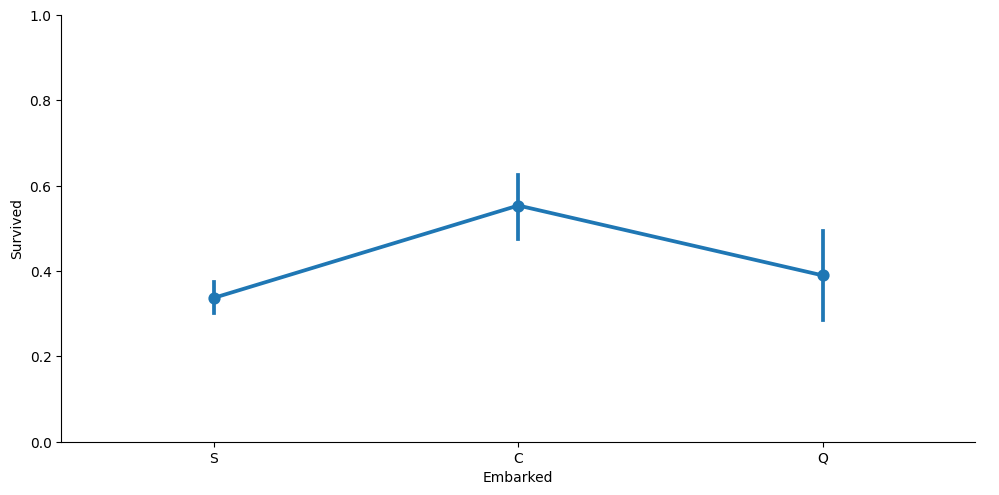

In [90]:
# Generate categorical plots for features
for col in ['Title', 'Sex', 'Cabin_ind', 'Embarked']:
    sns.catplot(x=col, y='Survived', data=titanic_cat, kind='point', aspect=2)
    plt.ylim(0,1)

In [91]:
# Split Embarked by whether the passenger had a cabin
titanic_cat.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129
